In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid")

In [4]:
movies = pd.read_csv("/Users/komalkumari/Downloads/ml-latest-small/movies.csv")
ratings = pd.read_csv("/Users/komalkumari/Downloads/ml-latest-small/ratings.csv")
tags = pd.read_csv("/Users/komalkumari/Downloads/ml-latest-small/tags.csv")

df = ratings.merge(movies, on = "movieId", how = "left")
df["years"] = df["title"].str.extract(r"\((\d{4})\)").astype(float)

df.head()

,userId,movieId,rating,timestamp,title,genres,years
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,1995.0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,1995.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995.0


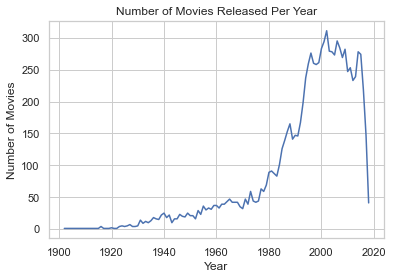

In [7]:
movies_per_year = df.groupby("years")["movieId"].nunique()

plt.figure()
movies_per_year.plot()
plt.title("Number of Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

# movie production increased significantly after 1990

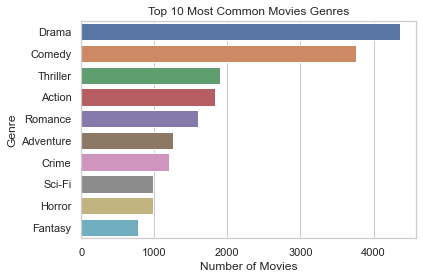

In [12]:
genres = movies["genres"].str.split("|").explode()
genre_counts = genres.value_counts()

plt.figure()
sns.barplot(x = genre_counts.values[:10], y = genre_counts.index[:10])
plt.title("Top 10 Most Common Movies Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

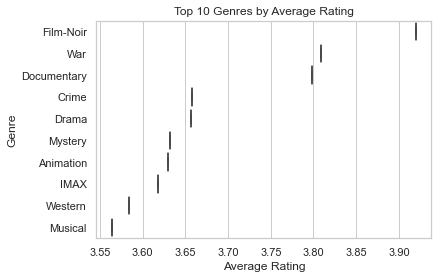

In [15]:
genre_ratings = (
    df.assign(genres = df["genres"].str.split("|")).explode("genres").groupby("genres")["rating"].mean().sort_values(ascending = False)
)

plt.figure()
sns.boxplot(x = genre_ratings.values[:10], y = genre_ratings.index[:10])
plt.title("Top 10 Genres by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()
# war and film & nior often receive higher ratings.

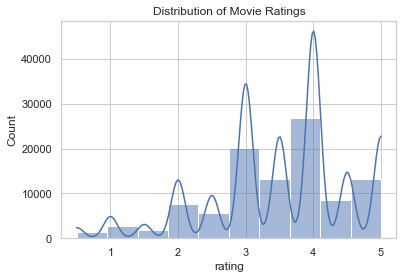

In [16]:
plt.figure()
sns.histplot(df["rating"], bins = 10, kde = True)
plt.title("Distribution of Movie Ratings")
plt.ylabel("Count")
plt.show()

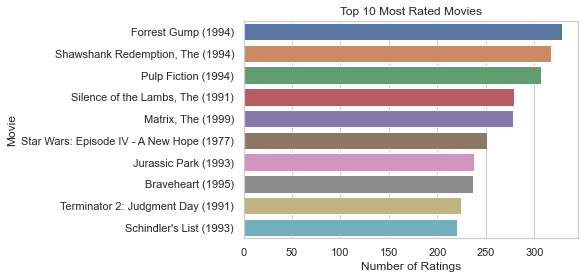

In [18]:
top_movies = (
    df.groupby("title")["rating"].count().sort_values(ascending = False).head(10)
)

plt.figure()
sns.barplot(x = top_movies.values, y = top_movies.index)
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie")
plt.show()

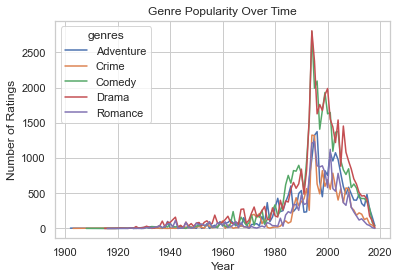

In [23]:
genre_time = (
    df.assign(genres = df["genres"].str.split("|")).explode("genres").groupby(["years", "genres"])["rating"].count().reset_index()
)

top_genres = genre_time["genres"].value_counts().head(5).index
genre_time = genre_time[genre_time["genres"].isin(top_genres)]

plt.figure()
sns.lineplot(data =genre_time, x = "years", y = "rating", hue = "genres")
plt.title("Genre Popularity Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.show()

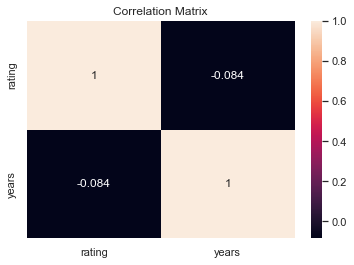

In [25]:
corr = df[["rating", "years"]].corr()

plt.figure()
sns.heatmap(corr, annot = True)
plt.title("Correlation Matrix")
plt.show()